In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create




In [2]:
Data = pd.read_csv(r"C:\Users\HP\Downloads\movies.csv")

In [3]:
#view top 5 rows
Data.head(5)

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [4]:
#chech missing data
Data.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
# data type
Data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
#Replace missing value
Data["budget"]=Data["budget"].fillna("0")
Data["gross"]=Data["gross"].fillna("0")
Data["runtime"]=Data["runtime"].fillna("0")
Data["score"]=Data["score"].fillna("0")

Data = Data.fillna({
    "rating": "Undefine",
    "released": "Undefine",
    "vote": "Undefine",
    "writer": "Undefine",
    "star" : "Undefine",
    "country": "Undefine",
    "company": "Undefine"
})

In [8]:
Data.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       3
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [36]:
#change column type

Data["budget"] = Data["budget"].astype("int64")
Data["gross"] = Data["gross"].astype("int64")
Data["runtime"] = Data["runtime"].astype("int64")
Data["score"] = Data["score"].astype("int64")
Data["name"] = Data["name"].astype("object")

In [11]:
#correct year column
Data["yearcorrect"] = Data["year"].astype(str)#.str[8:13]
Data.head(5)

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)      8   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)      5    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)      8  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)      7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)      7   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.      146        1980  
1   58853106   Columbia Pictures      104        1980  
2  538375067           Lucasfilm      124        1980  
3   83453539  Paramount Pictures       88        1980  
4   39846344      Orion Pictures       98        1980

In [12]:
#view last 5 rows
Data.tail(5)

name    rating   genre  year                          released  \
7663   More to Life  Undefine   Drama  2020  October 23, 2020 (United States)   
7664    Dream Round  Undefine  Comedy  2020  February 7, 2020 (United States)   
7665  Saving Mbango  Undefine   Drama  2020         April 27, 2020 (Cameroon)   
7666   It's Just Us  Undefine   Drama  2020   October 1, 2020 (United States)   
7667      Tee em el  Undefine  Horror  2020   August 19, 2020 (United States)   

      score  votes       director         writer              star  \
7663      3   18.0  Joseph Ebanks  Joseph Ebanks      Shannon Bond   
7664      4   36.0   Dusty Dukatz    Lisa Huston  Michael Saquella   
7665      5   29.0   Nkanya Nkwai   Lynno Lovert      Onyama Laura   
7666      0    NaN  James Randall  James Randall     Christina Roz   
7667      5    7.0   Pereko Mosia   Pereko Mosia  Siyabonga Mabaso   

            country  budget  gross                    company  runtime  \
7663  United States    7000      0                   Undefine       90   
7664  United States       0      0  Cactus Blue Entertainment       90   
7665  United States   58750      0           Embi Productions        0   
7666  United States   15000      0                   Undefine      120   
7667   South Africa       0      0                PK 65 Films      102   

     yearcorrect  
7663        2020  
7664        2020  
7665        2020  
7666        2020  
7667        2020

In [13]:
Data.sort_values(by=["gross"], inplace=True, ascending=False)

In [47]:
Data.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       5      0  2009       696      7  1100000.0      1155    1778   
7445   535       5      0  2019       183      8   903000.0       162     743   
3045  6896       5      6  1997       704      7  1100000.0      1155    1778   
6663  5144       5      0  2015       698      7   876000.0      1125    2550   
7244   536       5      0  2018       192      8   897000.0       162     743   

      star  country     budget       gross  company  runtime  yearcorrect  
5445  2334       56  237000000  2847246203     2253      162           29  
7445  2241       56  356000000  2797501328     1606      181           39  
3045  1595       56  200000000  2201647264     2253      194           17  
6663   524       56  245000000  2069521700     1540      138           35  
7244  2241       56  321000000  2048359754     1606      149           38

In [15]:
pd.set_option("display.max_rows", None)

In [16]:
# Drop any duplicate

Data["company"].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [17]:
# Budget high correlation
# company high correlation

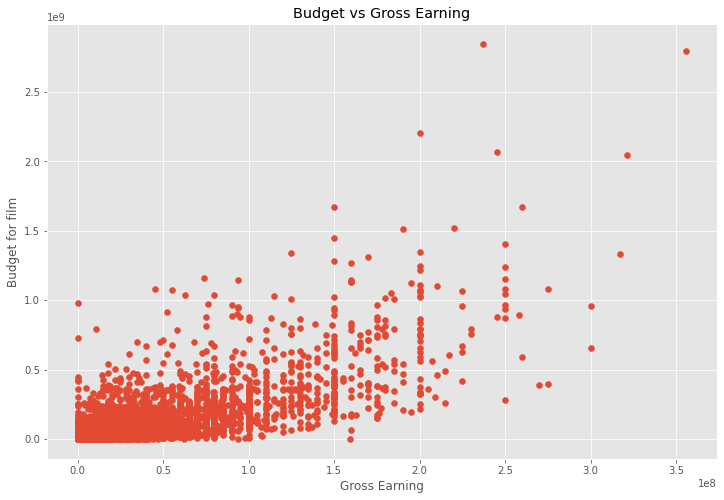

In [18]:
# scatter plot with budget vs gross

plt.scatter(x=Data["budget"], y=Data["gross"])

plt.title("Budget vs Gross Earning")
plt.xlabel("Gross Earning")

plt.ylabel("Budget for film")

plt.show()

In [19]:
Data.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)      7  1100000.0  James Cameron   
7445     April 26, 2019 (United States)      8   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)      7  1100000.0  James Cameron   
6663  December 18, 2015 (United States)      7   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)      8   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime yearcorrect  
5445  2847246203  Twentieth Century Fox      162        2009  
7445  2797501328         Marvel Studios      181        2019  
3045  2201647264  Twentieth Century Fox      194        1997  
6663  2069521700              Lucasfilm      138        2015  
7244  2048359754         Marvel Studios      149        2018

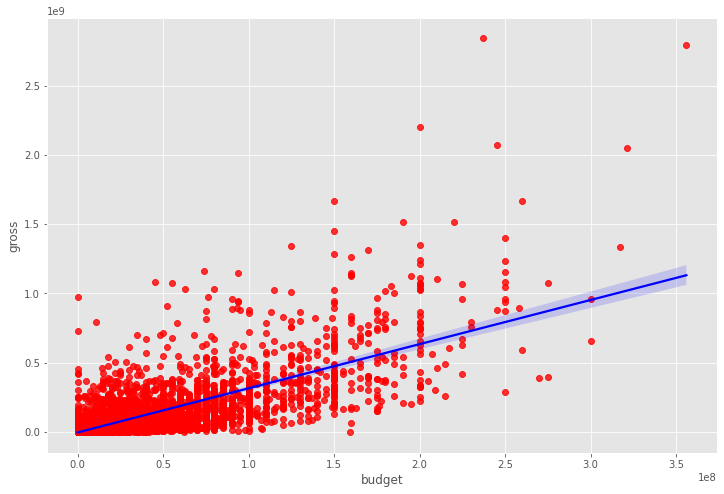

In [20]:
#plot budget vs gross using seaborn

sns.regplot(x="budget", y="gross", data=Data, scatter_kws={"color": "red"}, line_kws={"color":"blue"})
plt.show()

In [26]:
#looking at correlation #pearson, kendall, spearman 
Data.corr(method="pearson")

year     score     votes    budget     gross   runtime
year     1.000000  0.091429  0.222945  0.309212  0.261900  0.116358
score    0.091429  1.000000  0.393355  0.053473  0.177451  0.379436
votes    0.222945  0.393355  1.000000  0.486862  0.632834  0.307074
budget   0.309212  0.053473  0.486862  1.000000  0.750157  0.268372
gross    0.261900  0.177451  0.632834  0.750157  1.000000  0.244339
runtime  0.116358  0.379436  0.307074  0.268372  0.244339  1.000000

In [ ]:
#High correllation between budget and gross

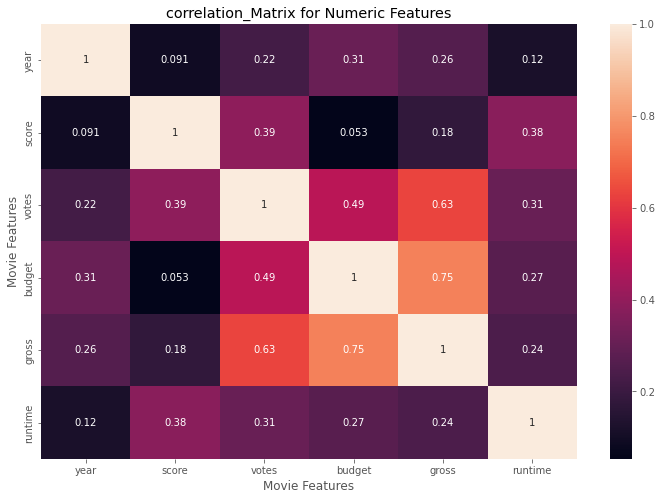

In [30]:
correlation_matrix = Data.corr(method="pearson")

sns.heatmap(correlation_matrix, annot=True)
plt.title("correlation_Matrix for Numeric Features")

plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

In [31]:
# look at company
Data.head(5)

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)      7  1100000.0  James Cameron   
7445     April 26, 2019 (United States)      8   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)      7  1100000.0  James Cameron   
6663  December 18, 2015 (United States)      7   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)      8   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime yearcorrect  
5445  2847246203  Twentieth Century Fox      162        2009  
7445  2797501328         Marvel Studios      181        2019  
3045  2201647264  Twentieth Century Fox      194        1997  
6663  2069521700              Lucasfilm      138        2015  
7244  2048359754         Marvel Studios      149        2018

In [37]:
Df_numerized = Data
for col_name in Df_numerized.columns:
    if(Df_numerized[col_name].dtype=="object"):
        Df_numerized[col_name]=Df_numerized[col_name].astype("category")
        Df_numerized[col_name]=Df_numerized[col_name].cat.codes
        
    
Df_numerized

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       5      0  2009       696      7  1100000.0      1155    1778   
7445   535       5      0  2019       183      8   903000.0       162     743   
3045  6896       5      6  1997       704      7  1100000.0      1155    1778   
6663  5144       5      0  2015       698      7   876000.0      1125    2550   
7244   536       5      0  2018       192      8   897000.0       162     743   
7480  6194       4      2  2019      1488      6   222000.0      1455    1919   
6653  2969       5      0  2015      1704      7   593000.0       517    3568   
6043  5502       5      0  2012      2472      8  1300000.0      1517    2314   
6646  2145       5      0  2015       221      7   370000.0      1189     706   
7494  2131       4      2  2019      2676      6   148000.0       432    1950   
6644   534       5      0  2015      2235      7   777000.0      1517    2314   
7247   791       5      0  2018       959      7   661000.0      2457    3795   
5845  2407       5      1  2011      1445      8   790000.0       679    4052   
7075  5145       5      0  2017       661      7   581000.0      2282    3518   
7271  2970       5      0  2018      1799      6   277000.0      1121    1093   
6262  2130       4      2  2013      2715      7   585000.0       432    1950   
7072   657       4      7  2017      2022      7   283000.0       250    4000   
7281  2760       4      2  2018      1729      7   263000.0       303     491   
7055  5833       5      0  2017        61      6   214000.0       835    1431   
6244  2823       5      0  2013      2449      7   779000.0      2543    1174   
6688  3622       4      2  2015      1395      6   218000.0      1639     534   
6846  1056       5      0  2016      2488      7   694000.0       162     743   
7250   474       5      0  2018       748      6   404000.0      1189     990   
4245  6221       5      0  2003       680      8  1700000.0      2193    1745   
7458  5084       5      0  2019      1501      7   359000.0      1463     704   
7456  1061       5      0  2019      2213      6   478000.0       147     255   
5878  6968       5      0  2011      1870      6   390000.0      1886    1237   
6059  4951       5      0  2012      2804      7   642000.0      2476    3125   
6494  6967       5      0  2014      1849      5   302000.0      1886    1237   
2448  6194       1      2  1994      1811      8   970000.0      2415    1702   
6047  5726       5      0  2012      1510      8  1600000.0       483    2265   
7463  5141       5      0  2019       731      6   394000.0      1125     714   
7450  2930       6      5  2019      3062      8  1000000.0      2767    4248   
7488  6949       1      2  2019      1787      7   217000.0      1509    2158   
5685  6948       1      2  2010      1752      8   776000.0      1678    2158   
4852  4258       5      0  2006      1645      7   668000.0       996    4147   
6869  4616       5      0  2016       673      7   572000.0       912     717   
7481   290       4      1  2019      2394      6   239000.0      1031    2078   
5860  4261       5      0  2011      2350      6   492000.0      2341    4147   
7140  1552       4      2  2017      1896      6   119000.0      1639     758   
2245  2967       5      0  1993      1689      8   894000.0      2660    2931   
6908  1978       4      2  2016      1744      7   250000.0       124     215   
3451  5138       4      0  1999      2318      6   748000.0       963    1472   
5667   300       4      1  2010      2182      6   392000.0      2745    2607   
6863  7504       4      2  2016      2175      8   450000.0       362     576   
6045  6001       5      1  2012       651      7   773000.0      2193    1359   
3843  2412       4      1  2001      2593      7   685000.0       435    1741   
5243  5725       5      0  2008      1476      9  2400000.0       483    2265   
5652  2406       5      1  2010      

In [48]:
Data.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       5      0  2009       696      7  1100000.0      1155    1778   
7445   535       5      0  2019       183      8   903000.0       162     743   
3045  6896       5      6  1997       704      7  1100000.0      1155    1778   
6663  5144       5      0  2015       698      7   876000.0      1125    2550   
7244   536       5      0  2018       192      8   897000.0       162     743   

      star  country     budget       gross  company  runtime  yearcorrect  
5445  2334       56  237000000  2847246203     2253      162           29  
7445  2241       56  356000000  2797501328     1606      181           39  
3045  1595       56  200000000  2201647264     2253      194           17  
6663   524       56  245000000  2069521700     1540      138           35  
7244  2241       56  321000000  2048359754     1606      149           38

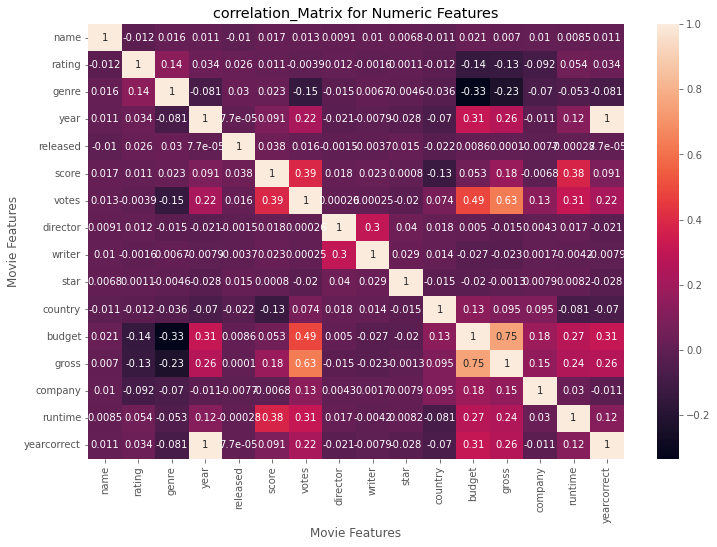

In [40]:
correlation_matrix = Df_numerized.corr(method="pearson")

sns.heatmap(correlation_matrix, annot=True)
plt.title("correlation_Matrix for Numeric Features")

plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

In [41]:
Df_numerized.corr(method="pearson")

name    rating     genre      year  released     score  \
name         1.000000 -0.012206  0.016355  0.011453 -0.010480  0.017191   
rating      -0.012206  1.000000  0.136127  0.033801  0.025526  0.011430   
genre        0.016355  0.136127  1.000000 -0.081261  0.030429  0.023134   
year         0.011453  0.033801 -0.081261  1.000000  0.000077  0.091429   
released    -0.010480  0.025526  0.030429  0.000077  1.000000  0.037851   
score        0.017191  0.011430  0.023134  0.091429  0.037851  1.000000   
votes        0.013088 -0.003870 -0.145307  0.222945  0.016154  0.393355   
director     0.009079  0.011951 -0.015258 -0.020795 -0.001526  0.017562   
writer       0.009985 -0.001610  0.006747 -0.007930 -0.003707  0.023469   
star         0.006844  0.001063 -0.004641 -0.027912  0.015474  0.000799   
country     -0.010573 -0.011927 -0.036064 -0.069945 -0.021736 -0.128635   
budget       0.020548 -0.141632 -0.334021  0.309212  0.008552  0.053473   
gross        0.006989 -0.131883 -0.234297  0.261900  0.000100  0.177451   
company      0.010365 -0.092351 -0.070044 -0.011428 -0.007670 -0.006814   
runtime      0.008483  0.054119 -0.052914  0.116358 -0.000281  0.379436   
yearcorrect  0.011453  0.033801 -0.081261  1.000000  0.000077  0.091429   

                votes  director    writer      star   country    budget  \
name         0.013088  0.009079  0.009985  0.006844 -0.010573  0.020548   
rating      -0.003870  0.011951 -0.001610  0.001063 -0.011927 -0.141632   
genre       -0.145307 -0.015258  0.006747 -0.004641 -0.036064 -0.334021   
year         0.222945 -0.020795 -0.007930 -0.027912 -0.069945  0.309212   
released     0.016154 -0.001526 -0.003707  0.015474 -0.021736  0.008552   
score        0.393355  0.017562  0.023469  0.000799 -0.128635  0.053473   
votes        1.000000  0.000260  0.000252 -0.019515  0.073685  0.486862   
director     0.000260  1.000000  0.299523  0.039875  0.017854  0.004976   
writer       0.000252  0.299523  1.000000  0.028887  0.014291 -0.026777   
star        -0.019515  0.039875  0.028887  1.000000 -0.015328 -0.020228   
country      0.073685  0.017854  0.014291 -0.015328  1.000000  0.131877   
budget       0.486862  0.004976 -0.026777 -0.020228  0.131877  1.000000   
gross        0.632834 -0.014916 -0.022963 -0.001326  0.095234  0.750157   
company      0.130718  0.004252  0.001740  0.007936  0.094650  0.182463   
runtime      0.307074  0.017062 -0.004213  0.008216 -0.080600  0.268372   
yearcorrect  0.222945 -0.020795 -0.007930 -0.027912 -0.069945  0.309212   

                gross   company   runtime  yearcorrect  
name         0.006989  0.010365  0.008483     0.011453  
rating      -0.131883 -0.092351  0.054119     0.033801  
genre       -0.234297 -0.070044 -0.052914    -0.081261  
year         0.261900 -0.011428  0.116358     1.000000  
released     0.000100 -0.007670 -0.000281     0.000077  
score        0.177451 -0.006814  0.379436     0.091429  
votes        0.632834  0.130718  0.307074     0.222945  
director    -0.014916  0.004252  0.017062    -0.020795  
writer      -0.022963  0.001740 -0.004213    -0.007930  
star        -0.001326  0.007936  0.008216    -0.027912  
country      0.095234  0.094650 -0.080600    -0.069945  
budget       0.750157  0.182463  0.268372     0.309212  
gross        1.000000  0.154040  0.244339     0.261900  
company      0.154040  1.000000  0.029500    -0.011428  
runtime      0.244339  0.029500  1.000000     0.116358  
yearcorrect  0.261900 -0.011428  0.116358     1.000000

In [42]:
correlation_mat = Df_numerized.corr()

corr_pairs=correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.012206
             genre          0.016355
             year           0.011453
             released      -0.010480
             score          0.017191
             votes          0.013088
             director       0.009079
             writer         0.009985
             star           0.006844
             country       -0.010573
             budget         0.020548
             gross          0.006989
             company        0.010365
             runtime        0.008483
             yearcorrect    0.011453
rating       name          -0.012206
             rating         1.000000
             genre          0.136127
             year           0.033801
             released       0.025526
             score          0.011430
             votes         -0.003870
             director       0.011951
             writer        -0.001610
             star           0.001063
             country       -0.011927
 

In [43]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.334021
budget       genre         -0.334021
gross        genre         -0.234297
genre        gross         -0.234297
             votes         -0.145307
votes        genre         -0.145307
budget       rating        -0.141632
rating       budget        -0.141632
             gross         -0.131883
gross        rating        -0.131883
score        country       -0.128635
country      score         -0.128635
company      rating        -0.092351
rating       company       -0.092351
year         genre         -0.081261
genre        year          -0.081261
             yearcorrect   -0.081261
yearcorrect  genre         -0.081261
runtime      country       -0.080600
country      runtime       -0.080600
company      genre         -0.070044
genre        company       -0.070044
yearcorrect  country       -0.069945
country      yearcorrect   -0.069945
             year          -0.069945
year         country       -0.069945
genre        runtime       -0.052914
r

In [46]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross        votes          0.632834
votes        gross          0.632834
gross        budget         0.750157
budget       gross          0.750157
name         name           1.000000
company      company        1.000000
rating       rating         1.000000
genre        genre          1.000000
year         year           1.000000
released     released       1.000000
score        score          1.000000
runtime      runtime        1.000000
votes        votes          1.000000
writer       writer         1.000000
star         star           1.000000
country      country        1.000000
budget       budget         1.000000
gross        gross          1.000000
director     director       1.000000
yearcorrect  yearcorrect    1.000000
             year           1.000000
year         yearcorrect    1.000000
dtype: float64

In [ ]:
# gross and budget have the highest correlation to gross earnings

# Company has low correlation